In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import uproot
from collections import Counter
import random

from ipywidgets import interact
import ipywidgets as widgets

import torch
import torch_geometric
from torch_geometric.loader import DataLoader
sys.path.append('/sps/t2k/cehrhardt/analysis_tools/tools')
from test_GCN.utils import train, Normalize
from dataset_from_processed import DatasetFromProcessed

In [4]:
graph_folder_path = '/sps/t2k/cehrhardt/dataset/graph_20_hitxyztc_t_xyzt_r12_types'
# graph_folder_path_r12 = '/sps/t2k/cehrhardt/dataset/graph_1.5M_hitxyztc_t_xyzt_r12'
# graph_folder_path_r25 = '/sps/t2k/cehrhardt/dataset/graph_1.5M_hitxyztc_t_xyzt_r25'
# graph_folder_path_t = '/sps/t2k/cehrhardt/dataset/graph_500k_hitxyztc_t_xyzt'
# graph_folder_path_pos = '/sps/t2k/cehrhardt/dataset/graph_500k_hitxyztc_pos_xyzt'

#Load the graph
dataset = DatasetFromProcessed(graph_folder_path = graph_folder_path, graph_file_names = ['data.pt'],  verbose = 1)
# dataset_r12 = DatasetFromProcessed(graph_folder_path = graph_folder_path_r12, graph_file_names = ['data.pt'],  verbose = 1)
# dataset_r25 = DatasetFromProcessed(graph_folder_path = graph_folder_path_r25, graph_file_names = ['data.pt'],  verbose = 1)
# dataset_t = DatasetFromProcessed(graph_folder_path = graph_folder_path_t, graph_file_names = ['data.pt'],  verbose = 1)
# dataset_pos = DatasetFromProcessed(graph_folder_path = graph_folder_path_pos, graph_file_names = ['data.pt'],  verbose = 1)

## Nice plots of graphs

In [62]:
def plot_event_graph(event_data, seed=1, k=1.3, iterations=300):
    G = nx.Graph()
    
    # Add nodes
    for i in range(event_data['x'].size(0)):
        G.add_node(i, feature=event_data['x'][i, 3].item())
    
    # Add edges
    edges = event_data['edge_index'].t().tolist()
    G.add_edges_from(edges)

    # Create labels
    labels = {i: f"{G.nodes[i]['feature']:.0f}" for i in G.nodes()}

    # Use spring layout for better visualization
    pos = nx.spring_layout(G, k=k, iterations=iterations, seed=seed)
    # pos = nx.kamada_kawai_layout(G)

    # Color nodes based on feature value
    node_colors = ['green' if color == 1 else 'red' for color in event_data['x'][:,5]]
    
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=300, node_color=node_colors, edge_color="black", font_size=8, width=1)
    plt.title(f"Event graph display with time of hit (in ns)")

    # Create custom legend
    legend_handles = [
        mpatches.Patch(color='green', label='Signal'),
        mpatches.Patch(color='red', label='Noise')
    ]
    plt.legend(handles=legend_handles, loc='best')

    plt.show()

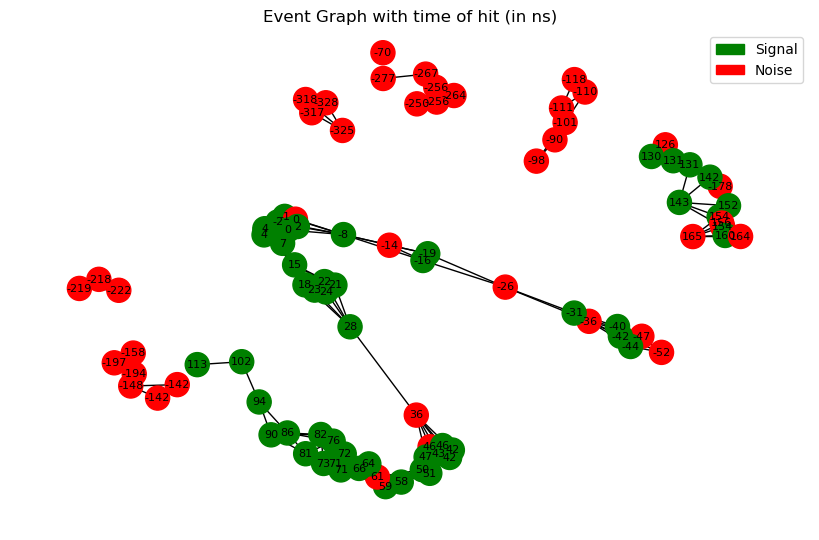

4432


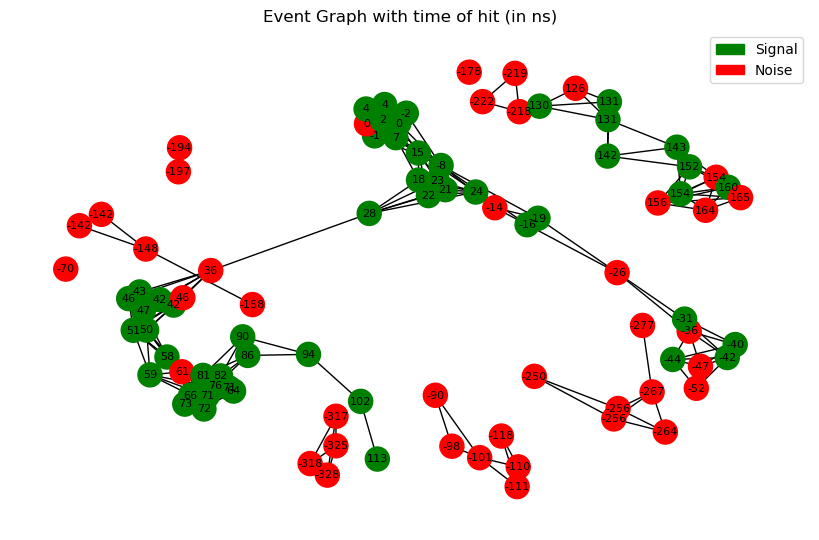

906


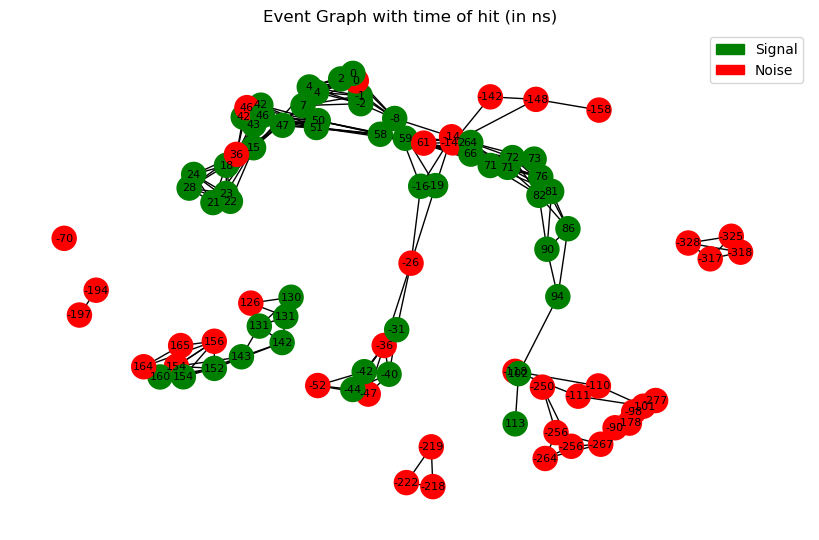

2553


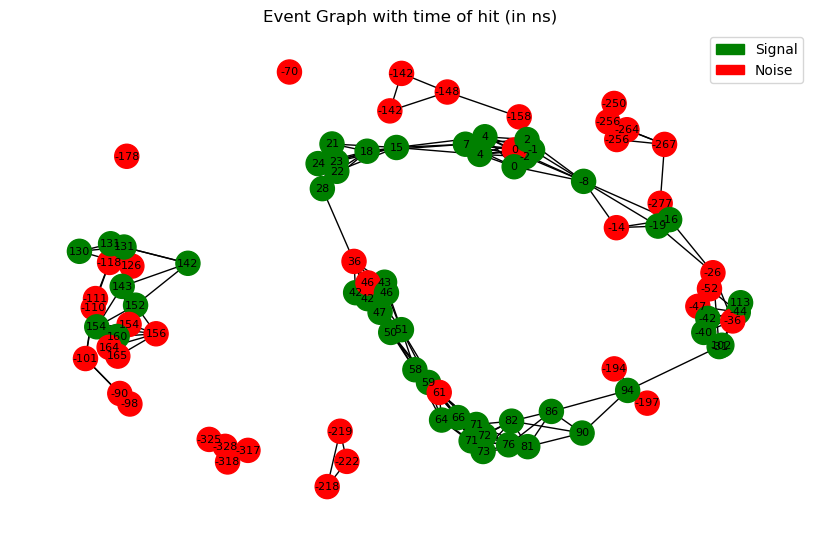

8228


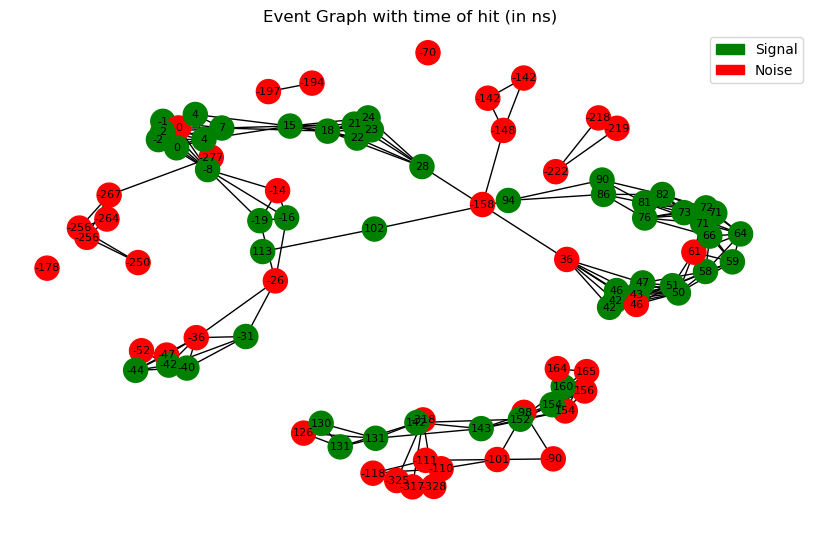

7510


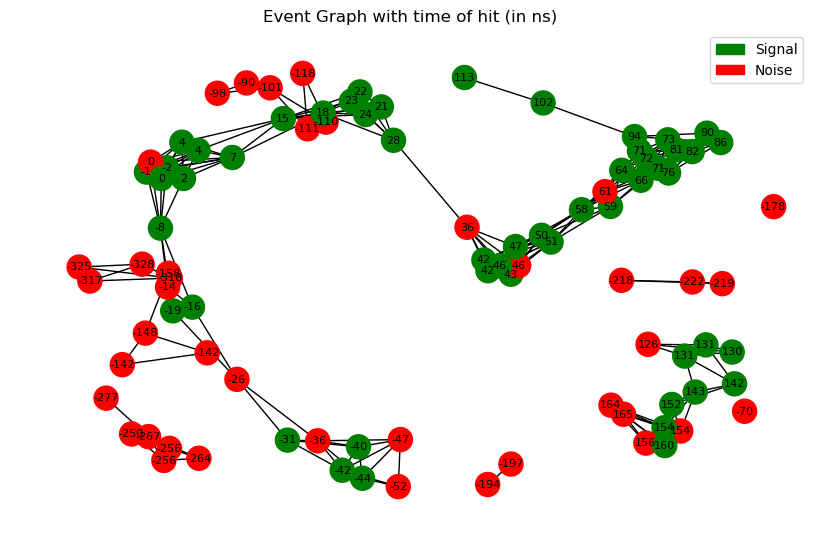

9521


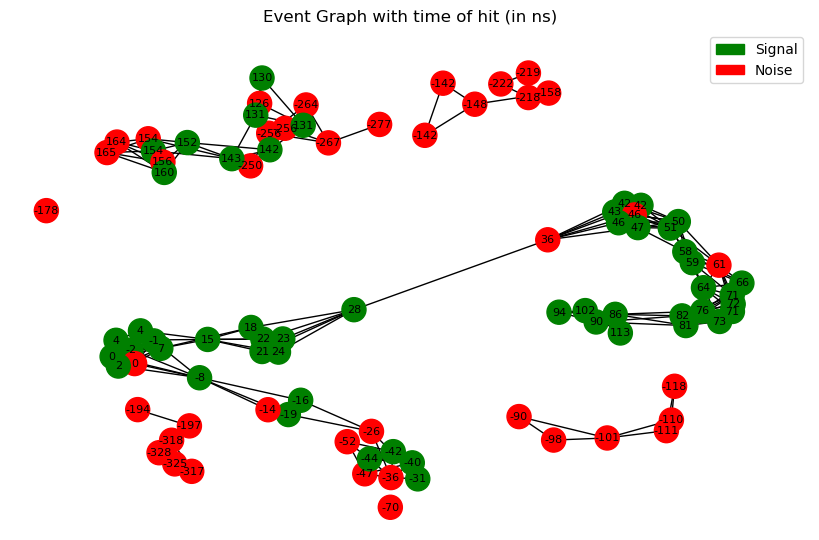

2468


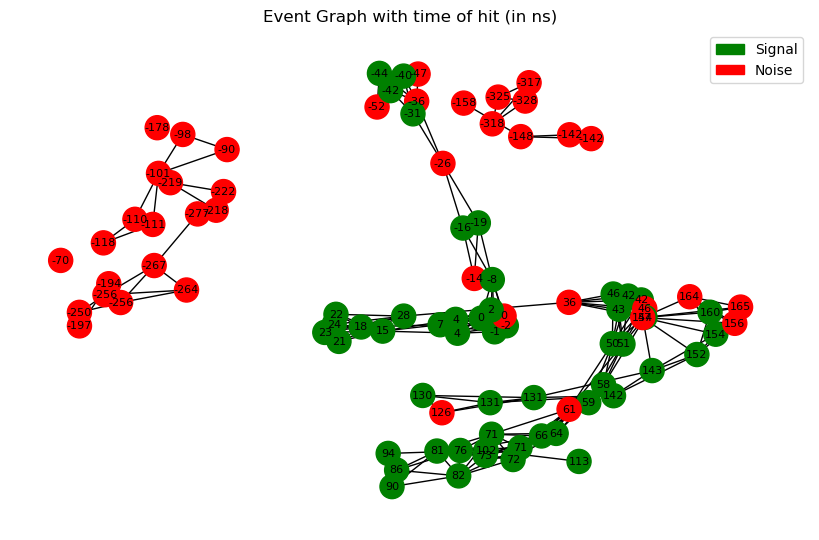

1938


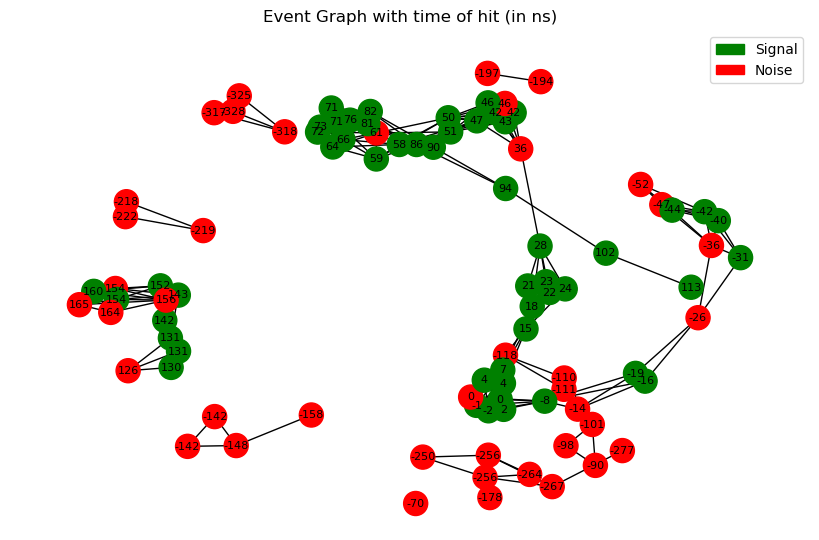

3604


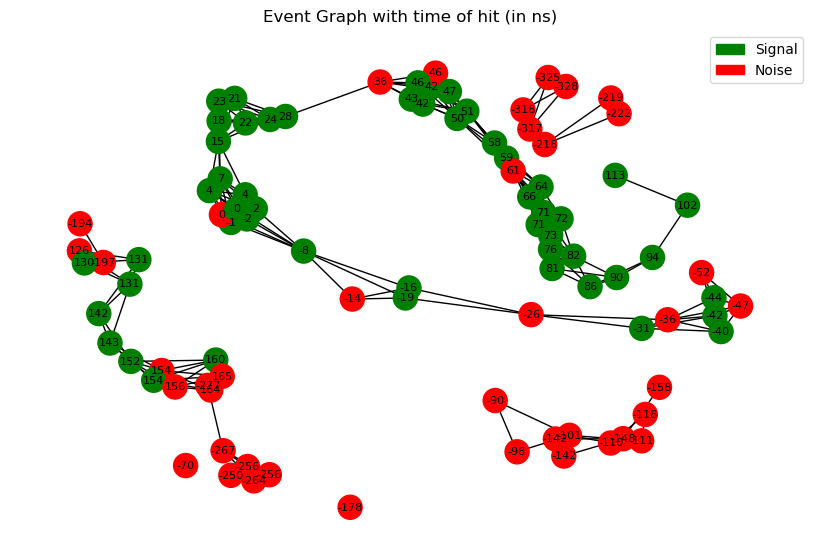

6279


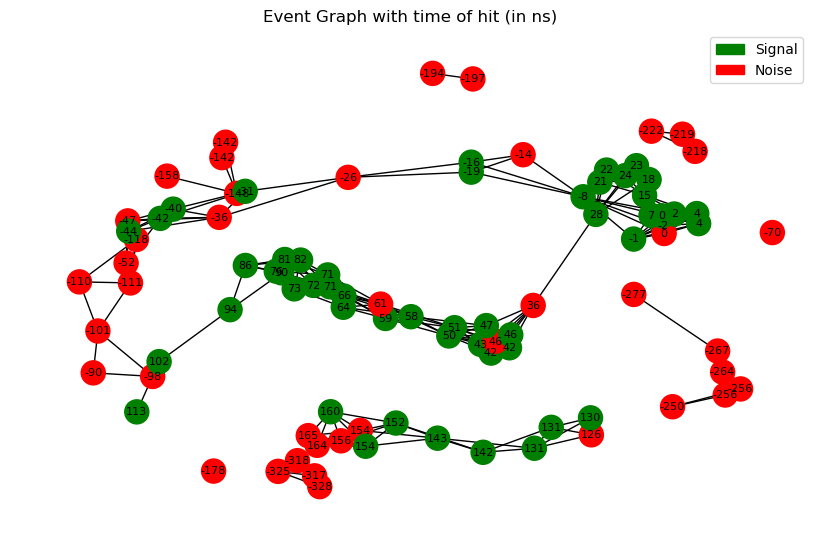

9368


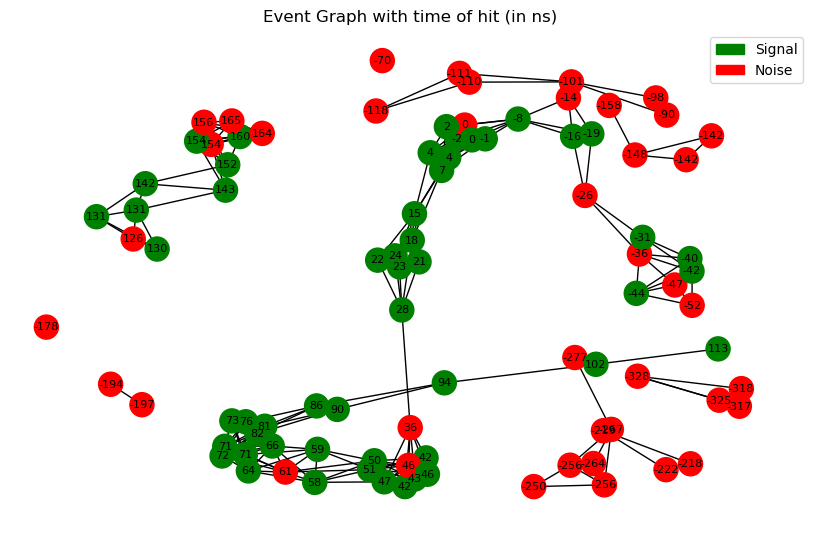

4661


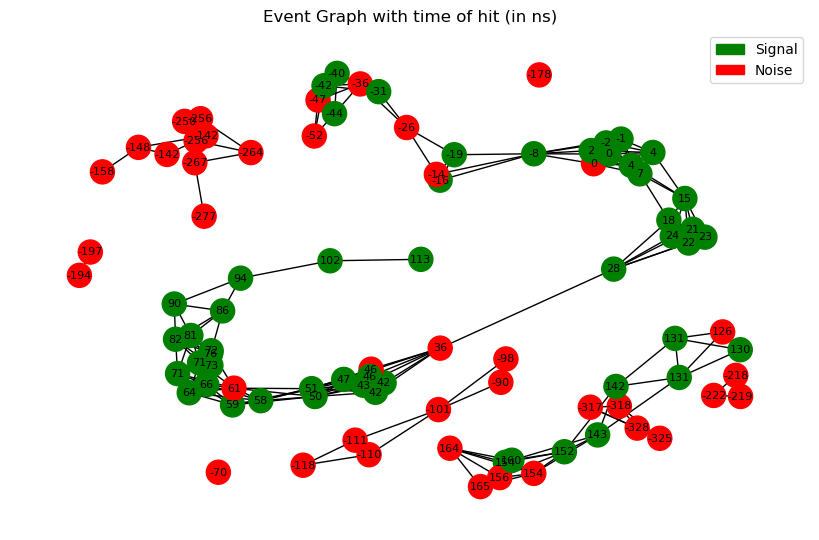

7855


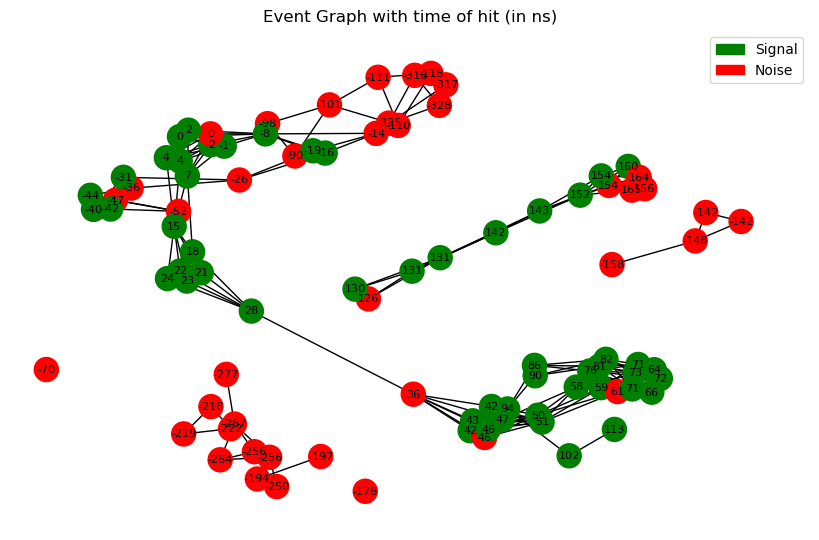

6161


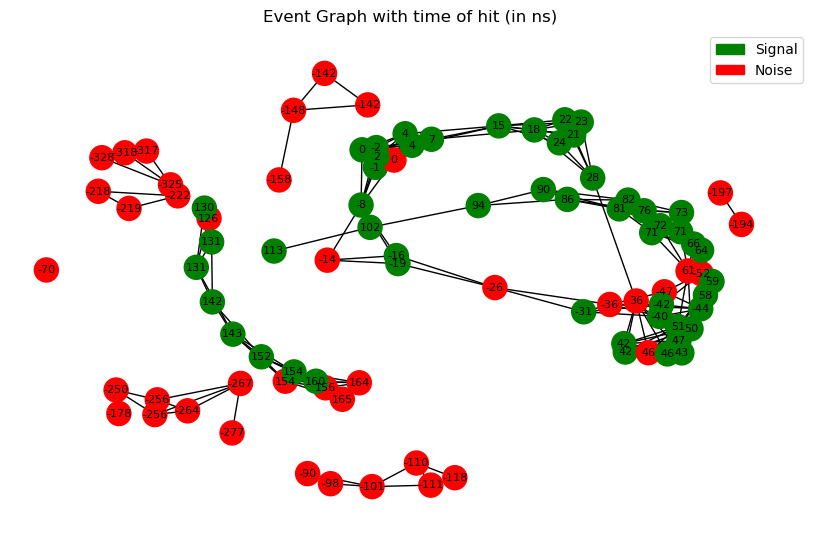

1598


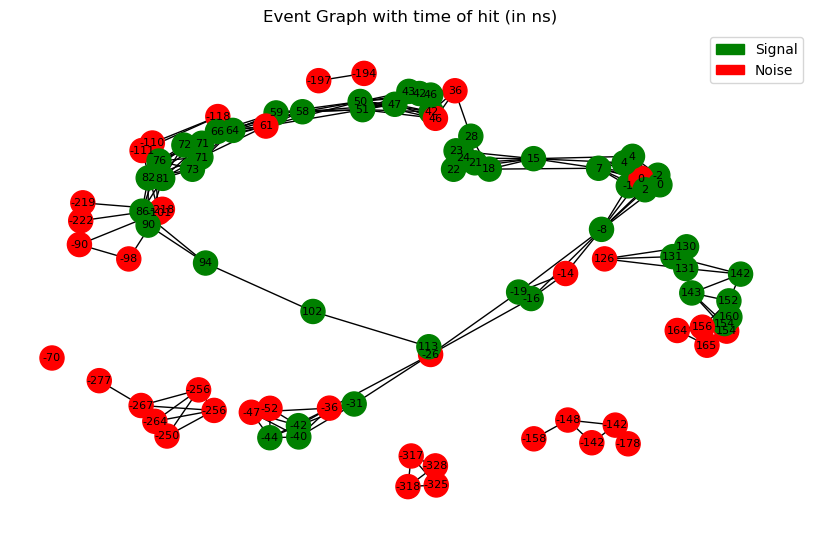

9588


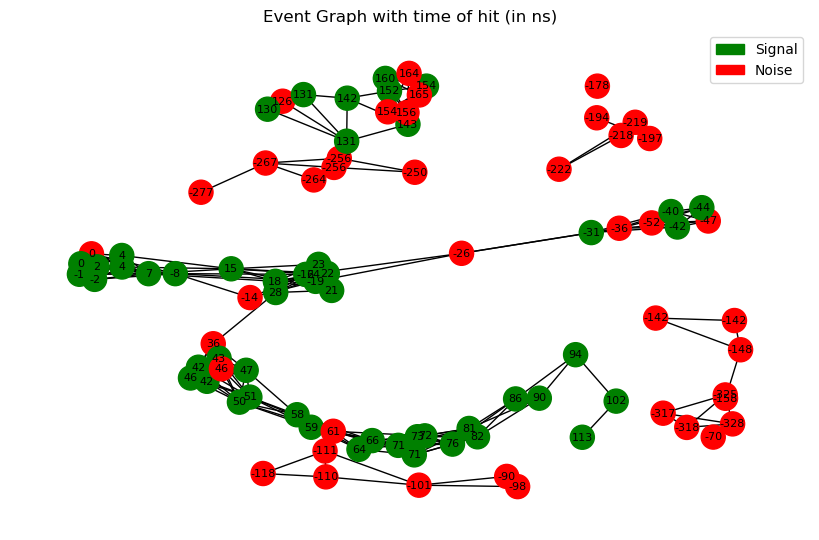

9948


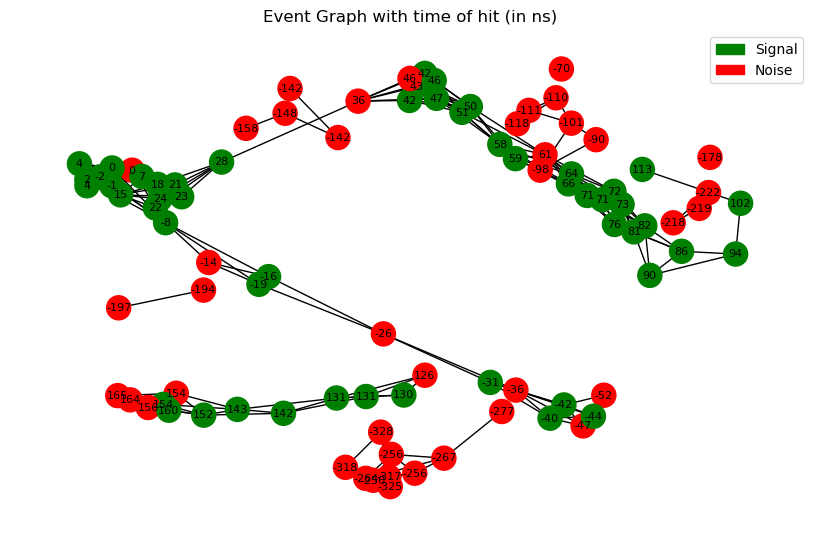

5889


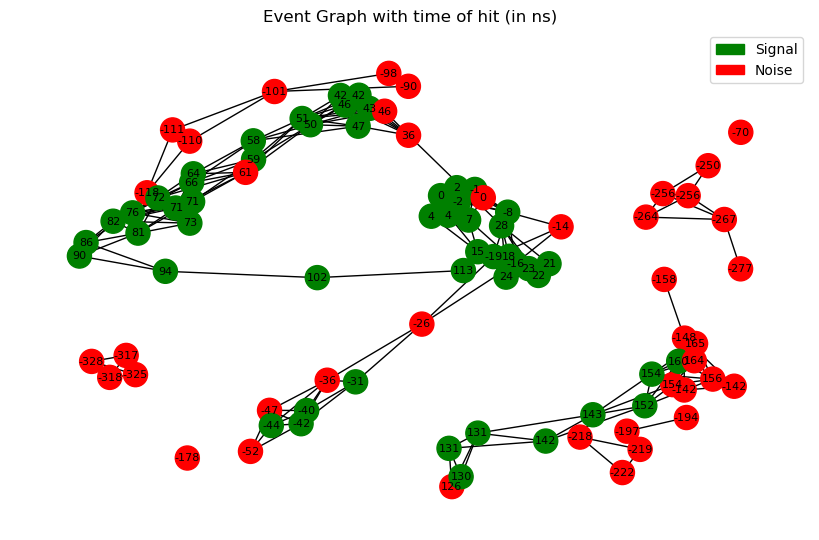

7538


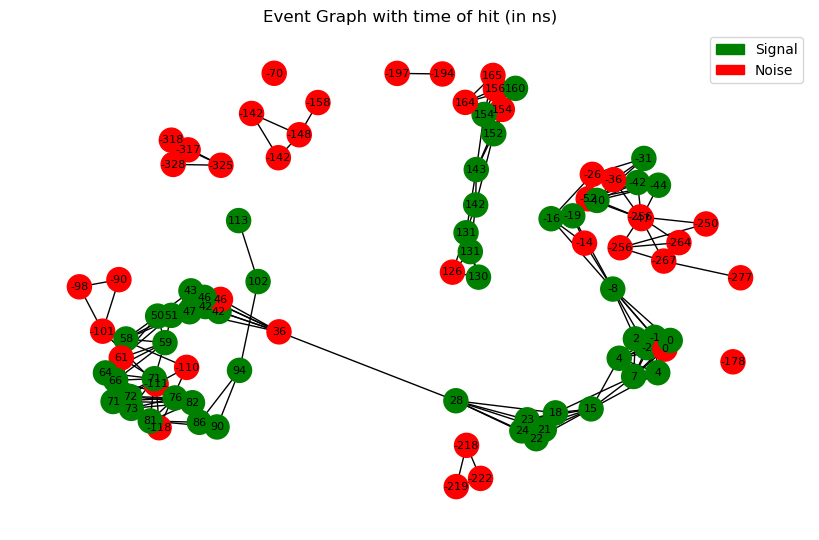

1303


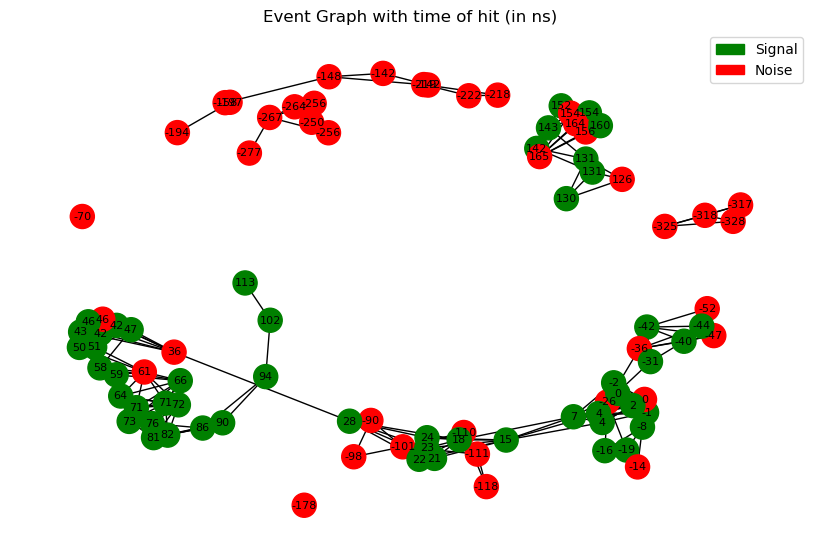

6090


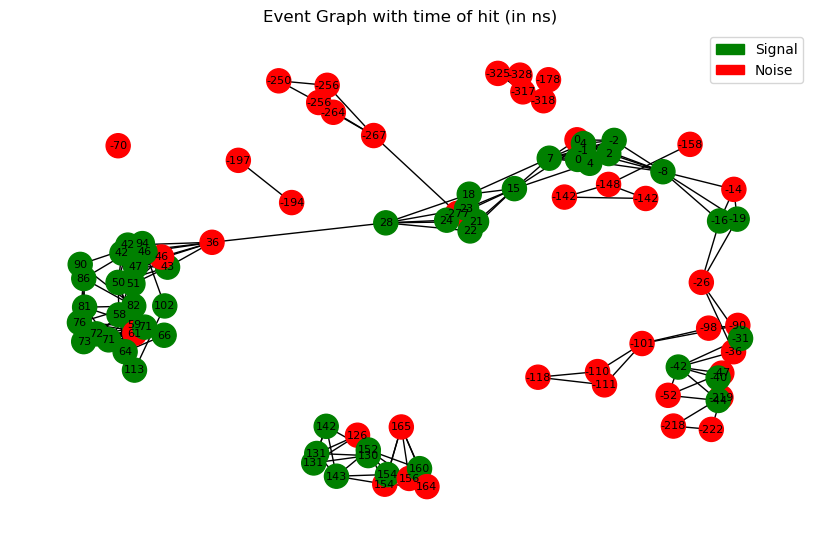

3170


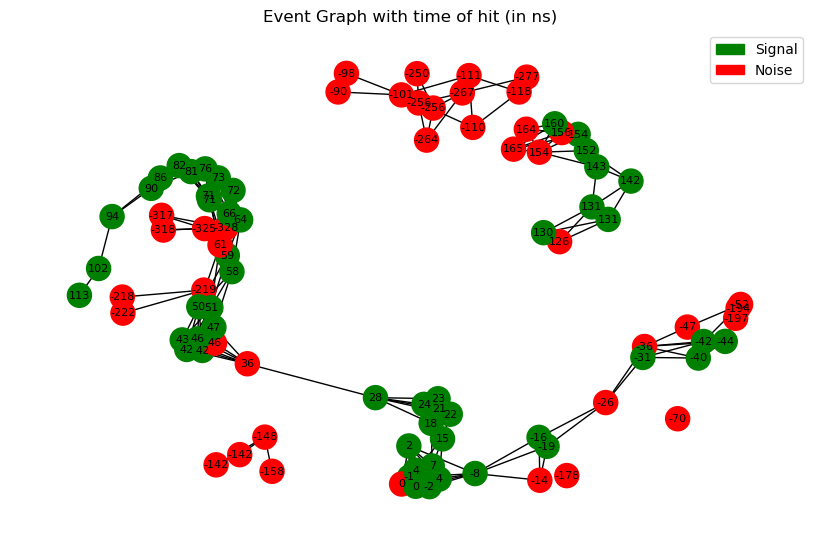

5579


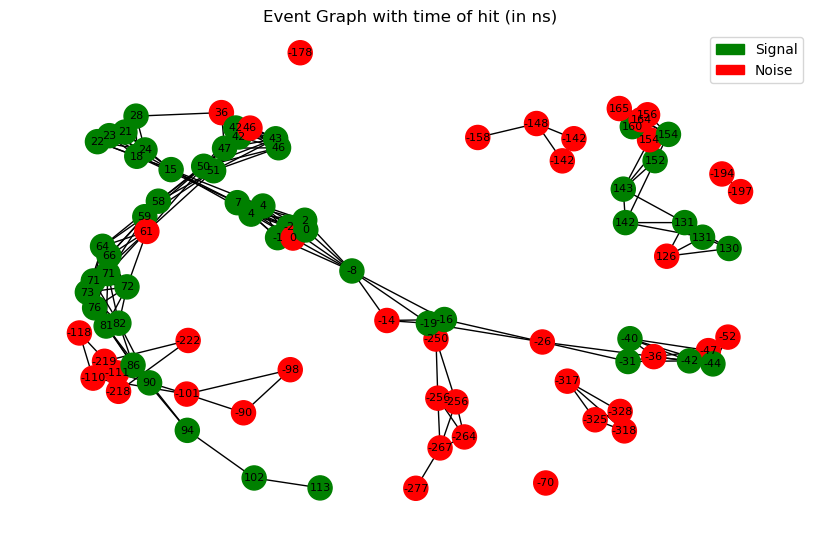

1265


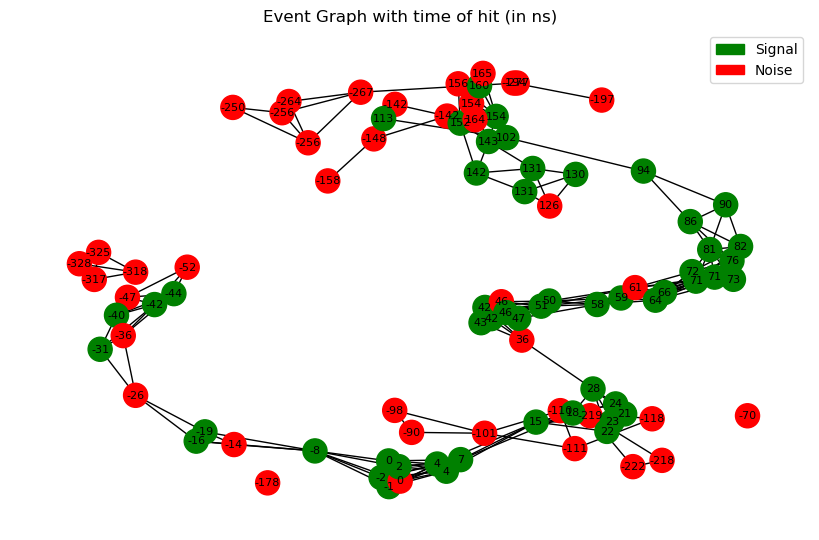

8093


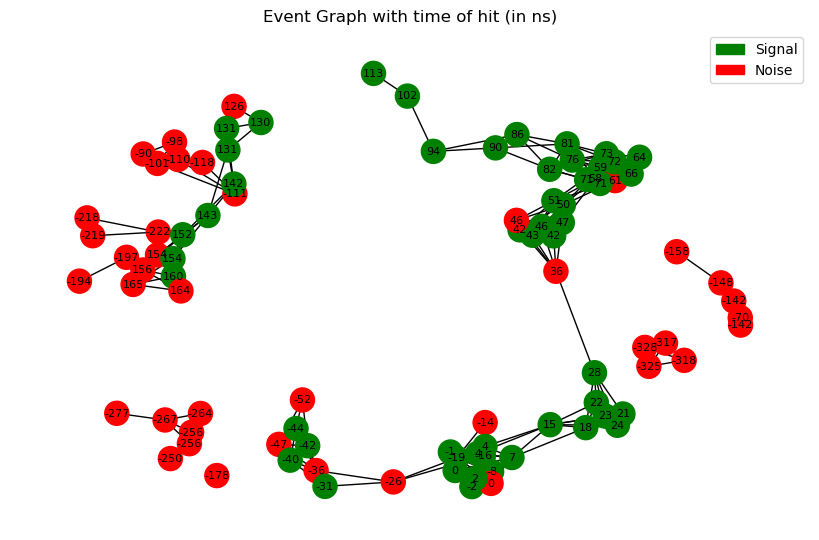

8980


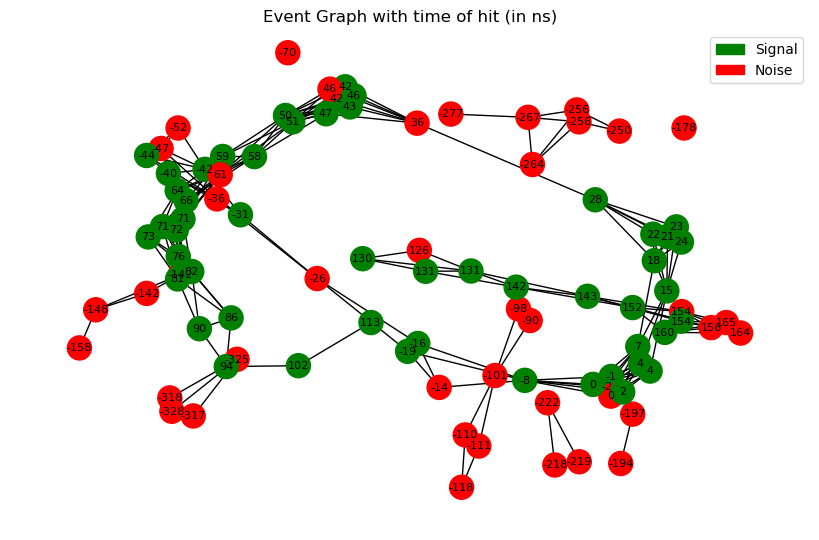

7890


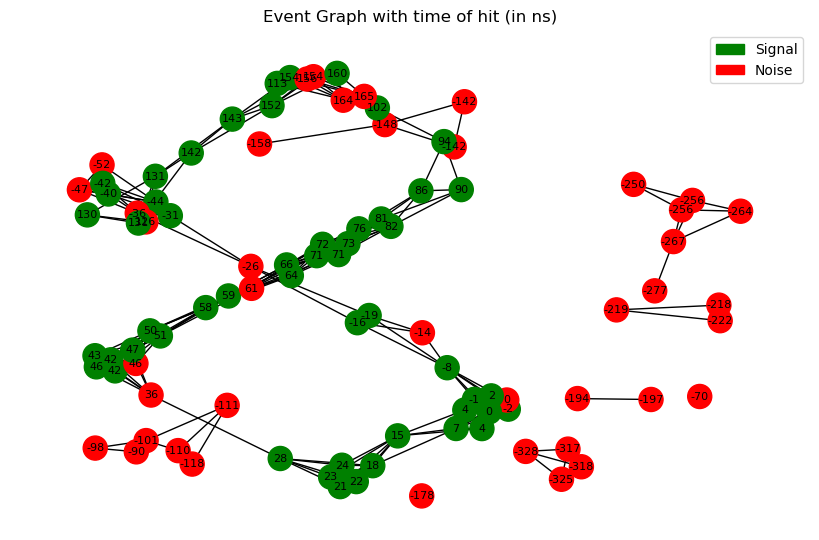

8833


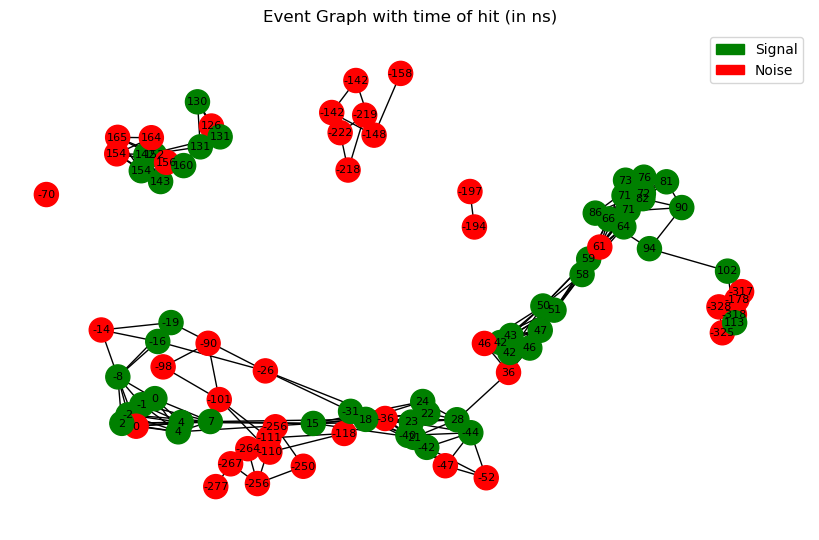

5075


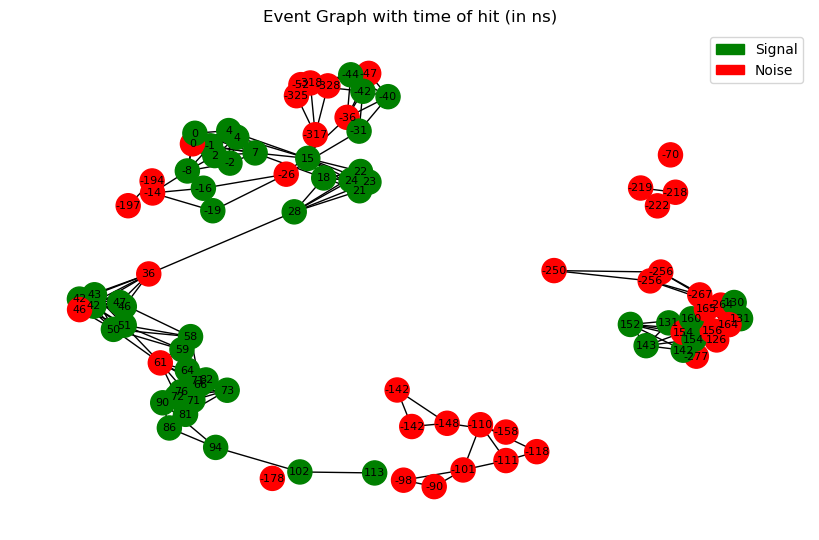

927


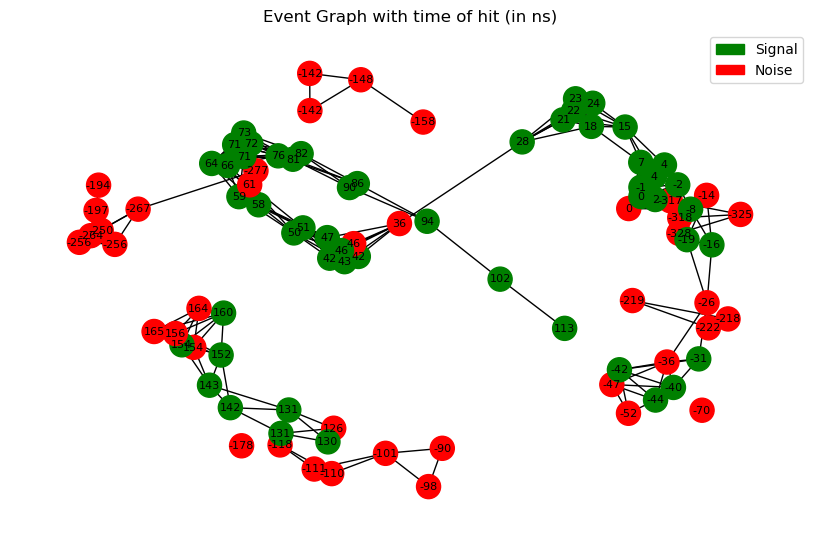

7872


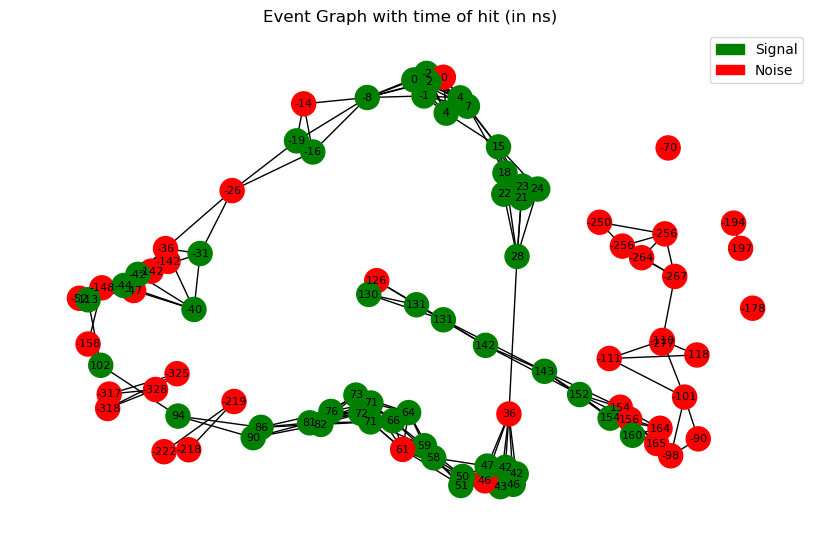

7486


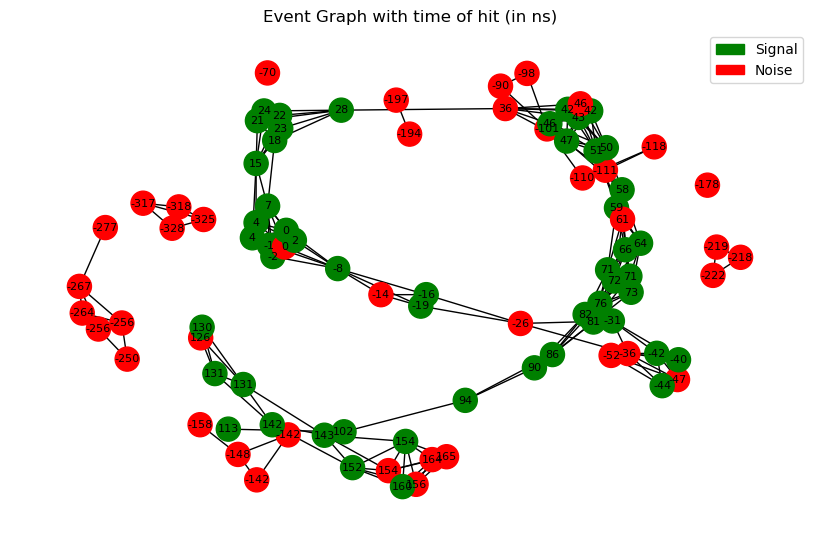

8292


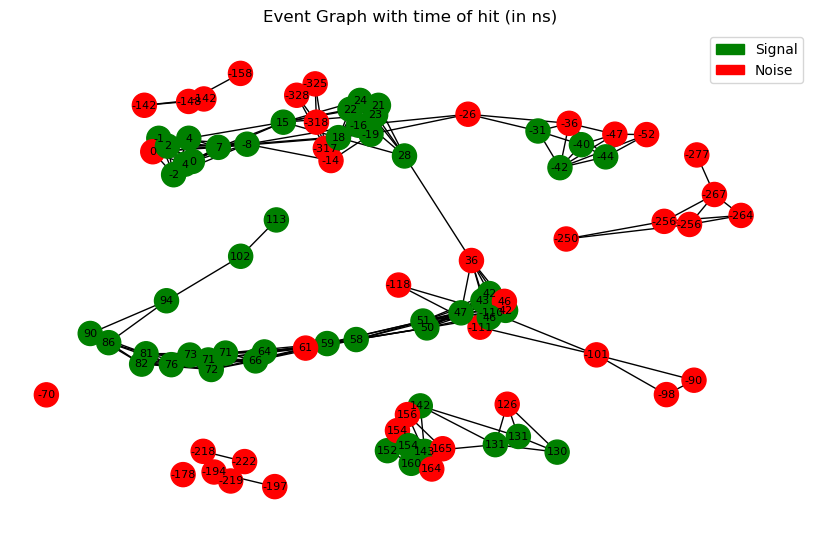

6801


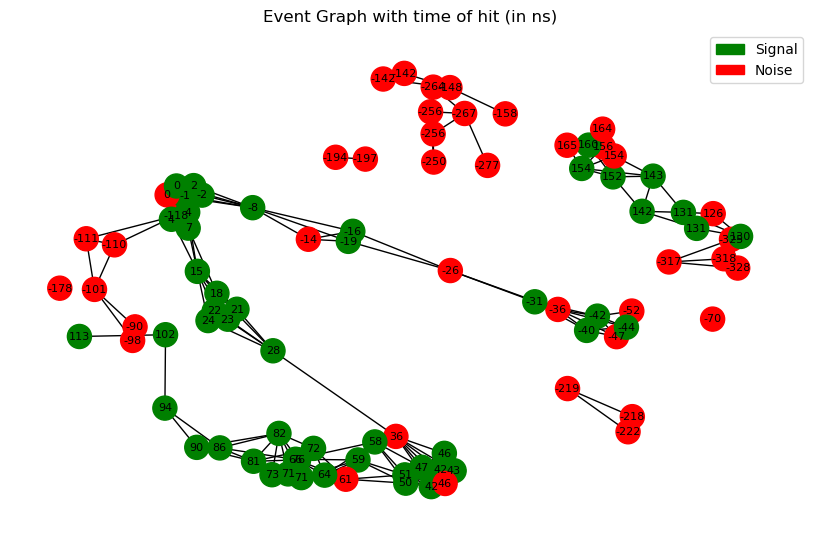

488


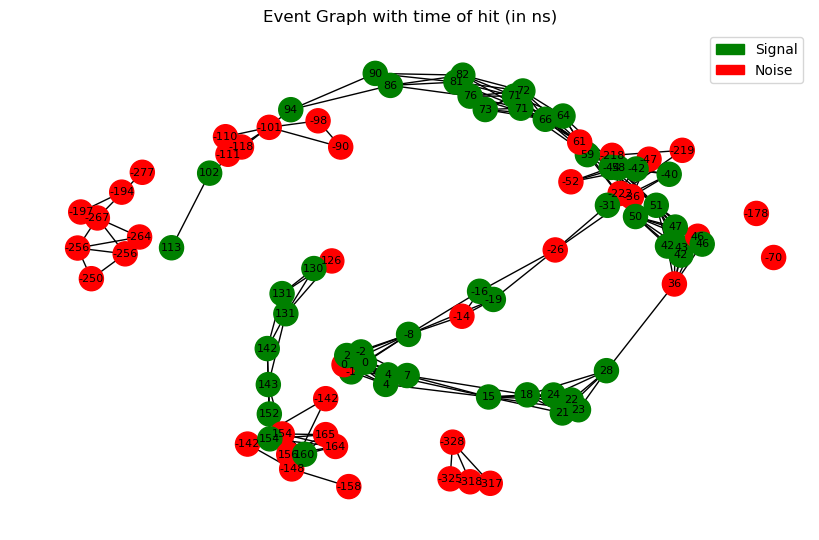

9630


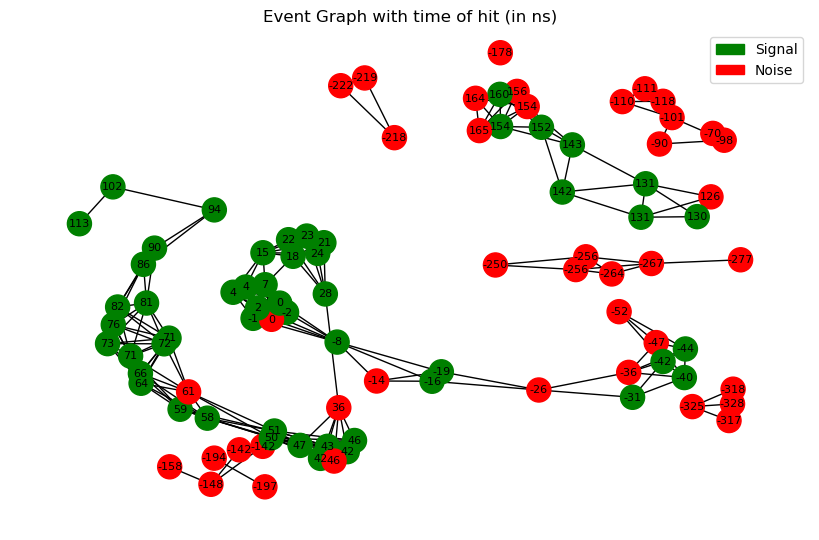

5975


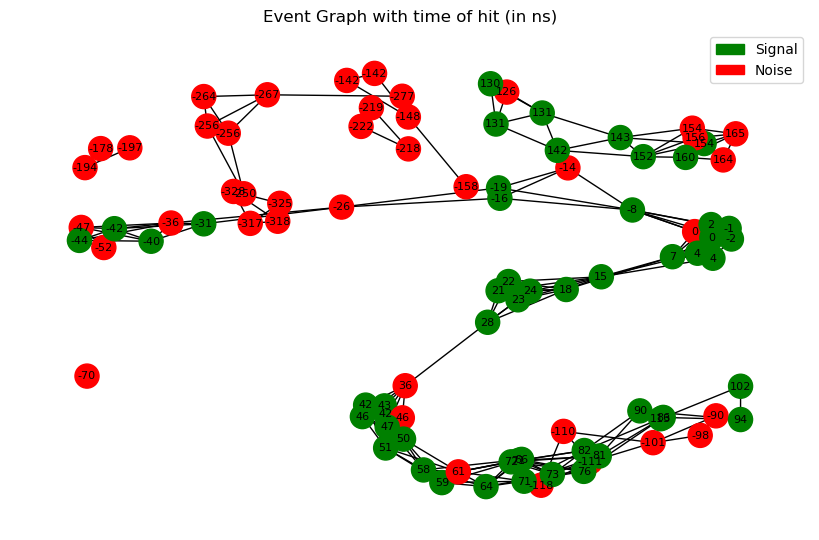

1164


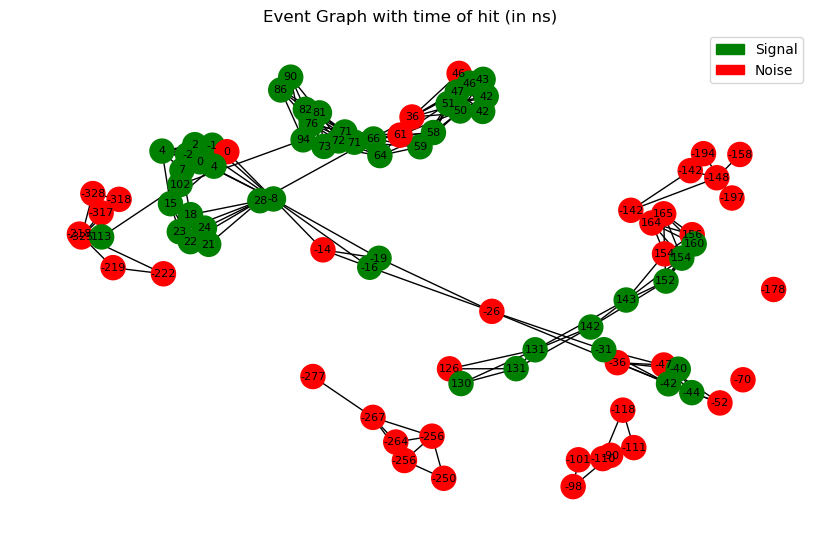

6832


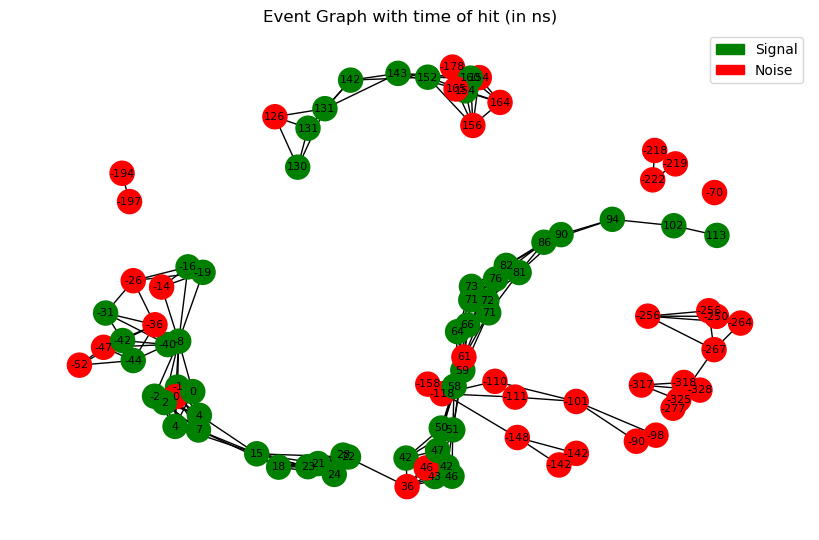

2256


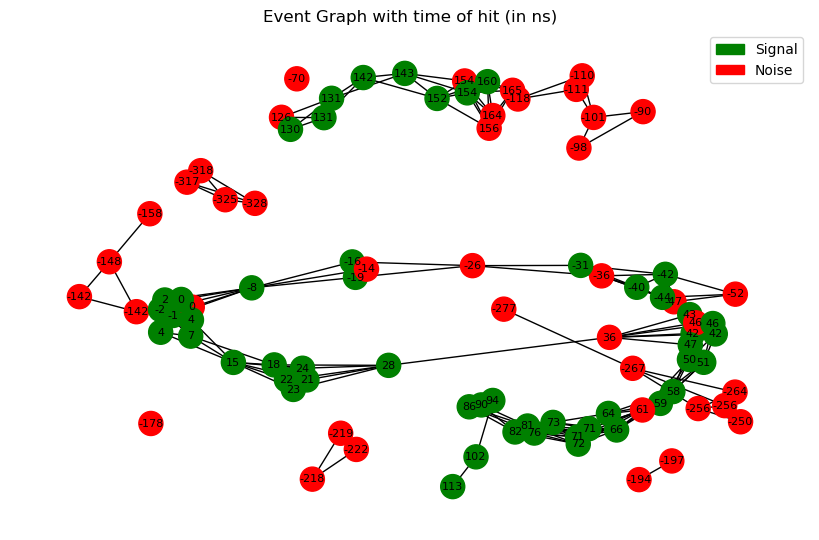

1751


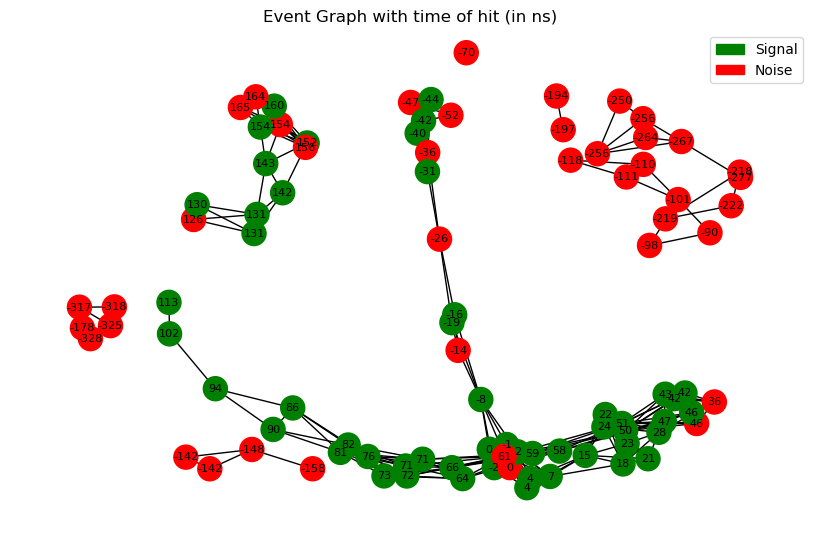

4402


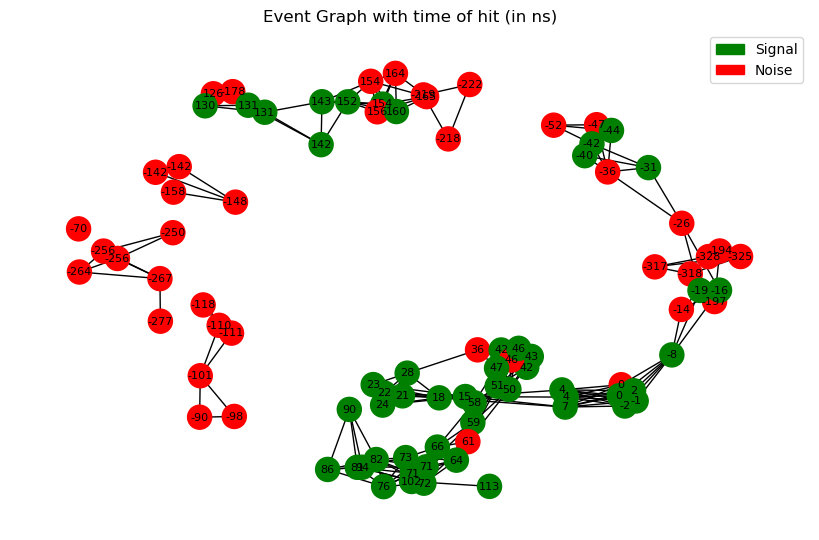

7718


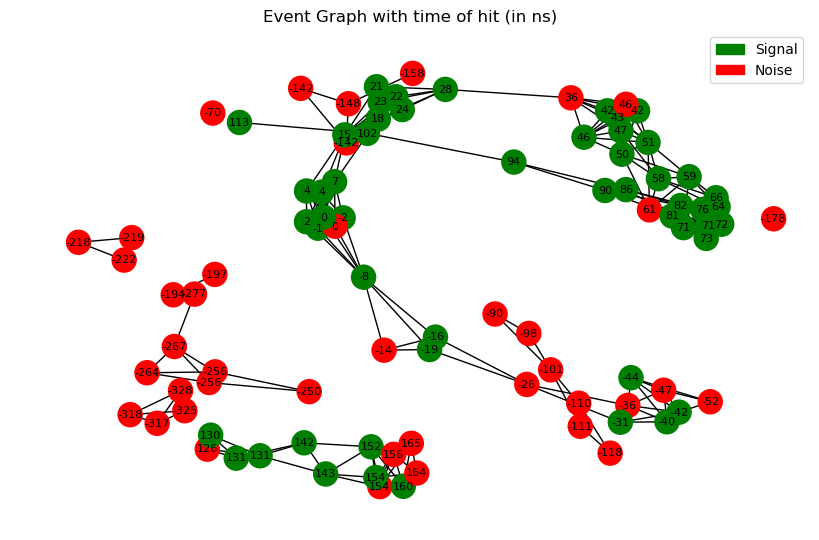

9983


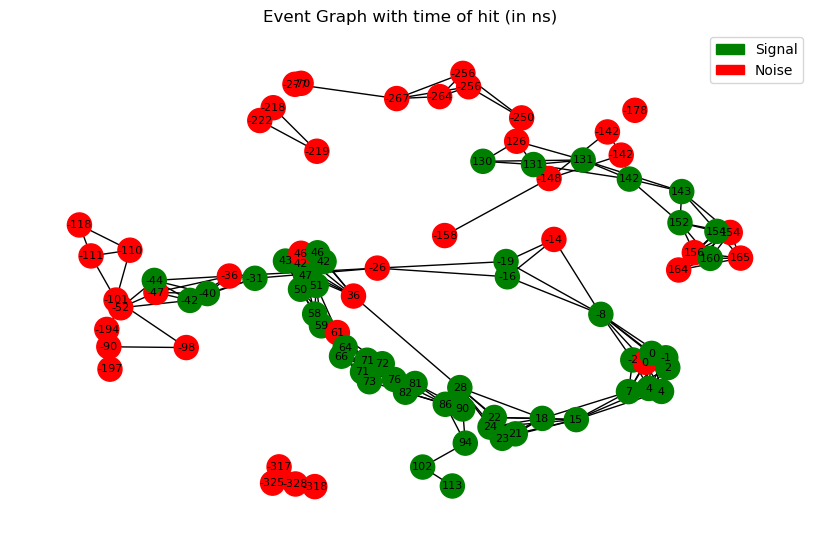

2221


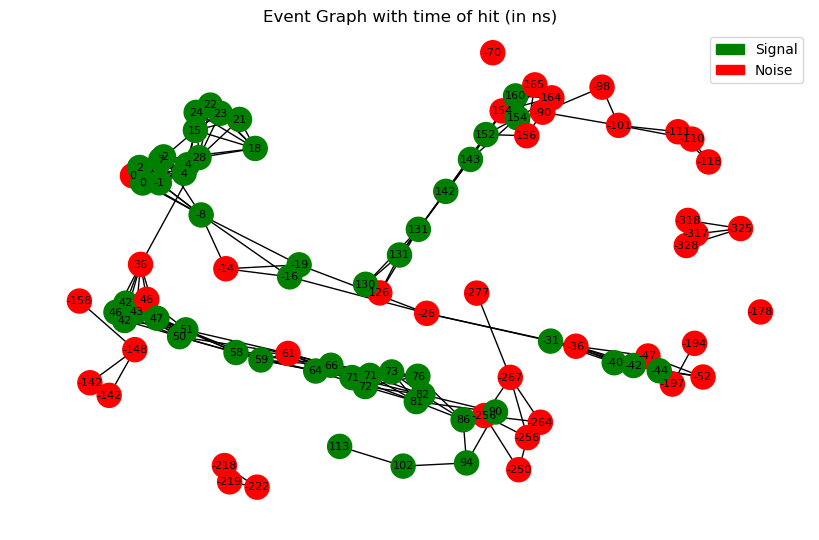

9562


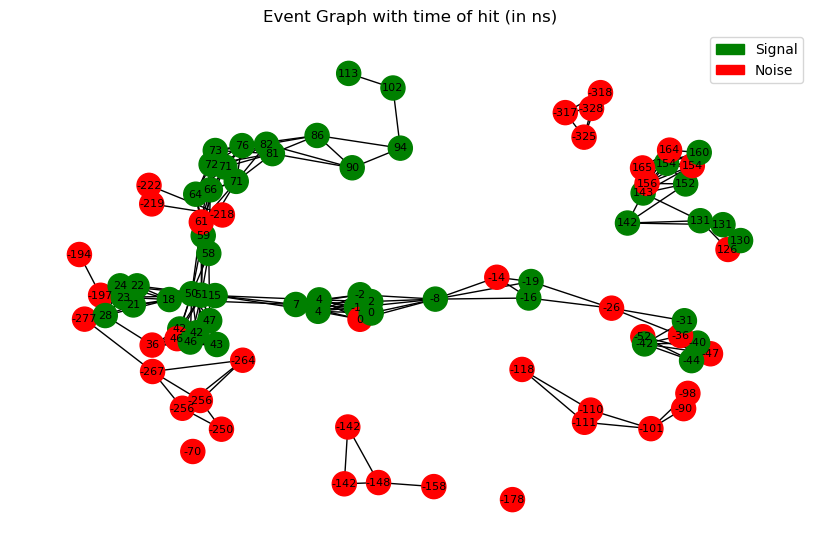

4245


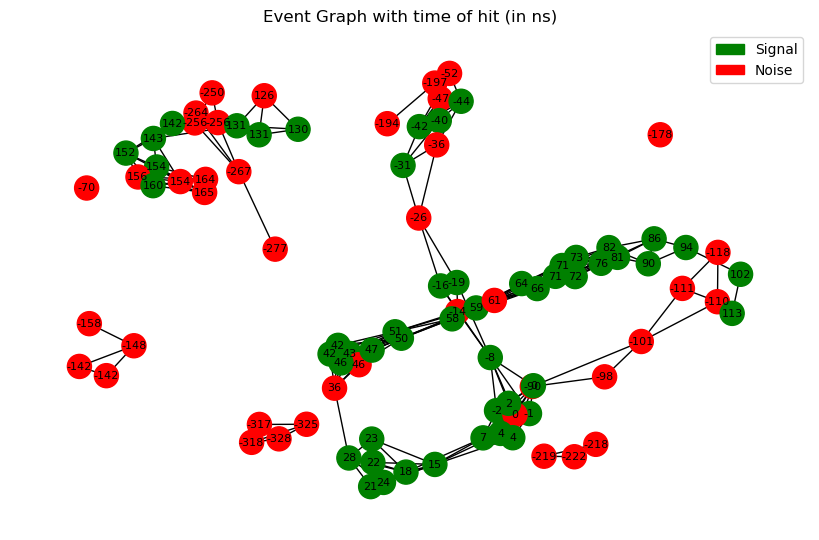

1765


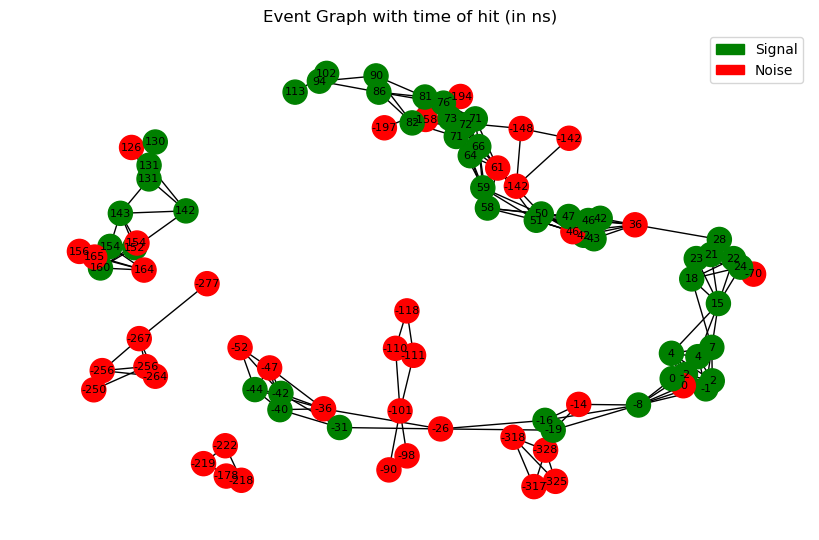

4800


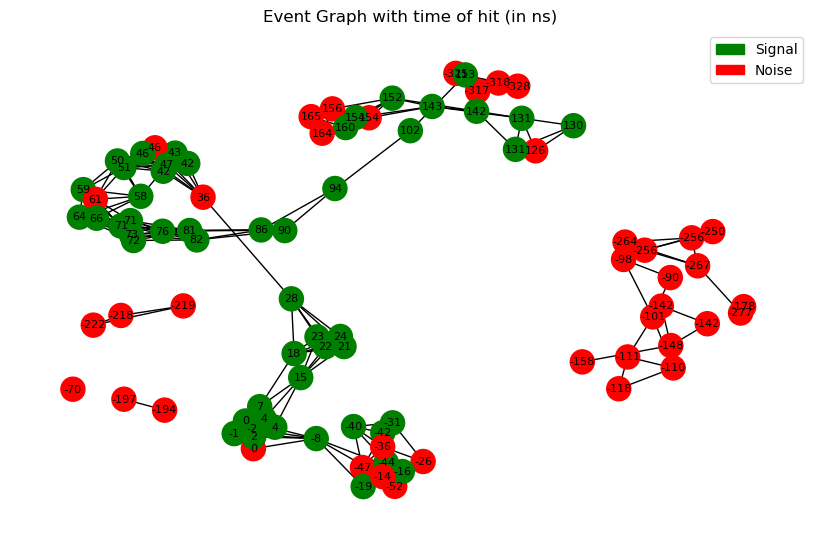

3206


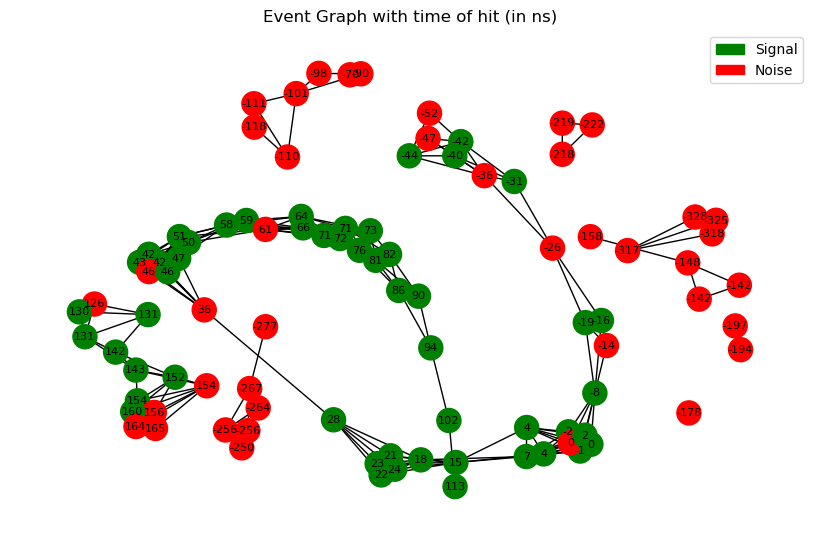

In [31]:
# Example of calling the function with different seeds and k values
plot_event_graph(dataset[16], seed=77, k=1.1)

seeds = random.sample(range(10000), 50)

# Loop through each combination of seed and k
for seed in seeds:
    print(seed)
    plot_event_graph(dataset[16], seed=seed, k=1.5, iterations=300)


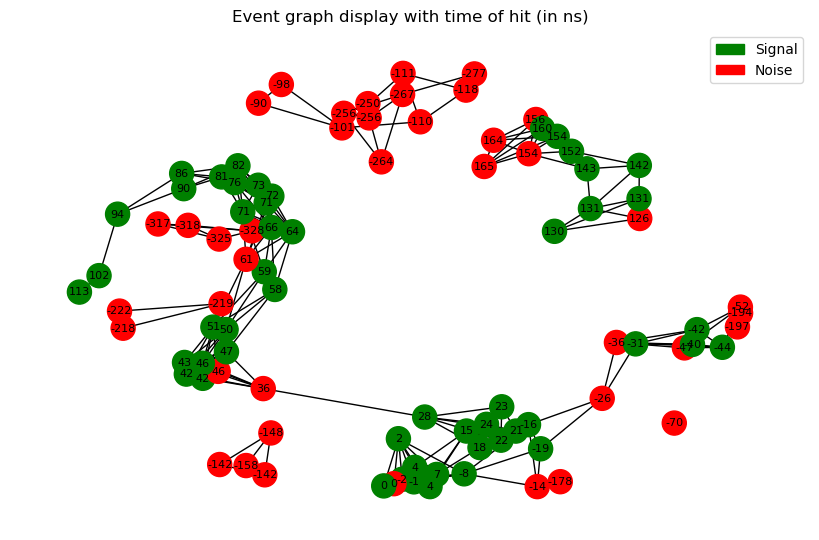

In [63]:
plot_event_graph(dataset[16], seed=3170, k=5.7, iterations=1000)

## Nbr of neighbors

Data(x=[111, 5], y=[4], pos=[111, 1], edge_index=[2, 740], idx=0)
{1: 1, 0: 1, 3: 1, 2: 1, 5: 1, 4: 1, 7: 5, 8: 6, 9: 6, 10: 6, 11: 5, 6: 4, 12: 6, 13: 4, 14: 4, 15: 4, 16: 5, 17: 6, 18: 5, 19: 6, 20: 6, 21: 6, 22: 7, 23: 7, 24: 8, 25: 8, 26: 10, 27: 9, 28: 9, 29: 9, 30: 9, 31: 7, 32: 7, 33: 7, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 9, 40: 11, 41: 11, 42: 12, 43: 13, 44: 13, 45: 13, 46: 13, 47: 13, 48: 13, 49: 13, 50: 13, 51: 14, 52: 15, 53: 13, 54: 10, 55: 10, 56: 10, 57: 10, 58: 10, 59: 10, 60: 12, 61: 12, 62: 10, 63: 8, 64: 8, 65: 8, 66: 8, 67: 8, 68: 5, 69: 5, 70: 6, 71: 8, 72: 9, 73: 9, 74: 8, 75: 8, 76: 10, 77: 11, 78: 10, 79: 9, 80: 8, 81: 8, 82: 7, 83: 5, 84: 5, 85: 2, 87: 4, 88: 3, 89: 4, 90: 4, 86: 1, 91: 2, 93: 2, 94: 3, 92: 2, 95: 4, 96: 3, 97: 4, 98: 4, 99: 3, 100: 1, 102: 1, 101: 1, 104: 1, 103: 1, 106: 5, 107: 5, 105: 2, 108: 4, 109: 4, 110: 4}


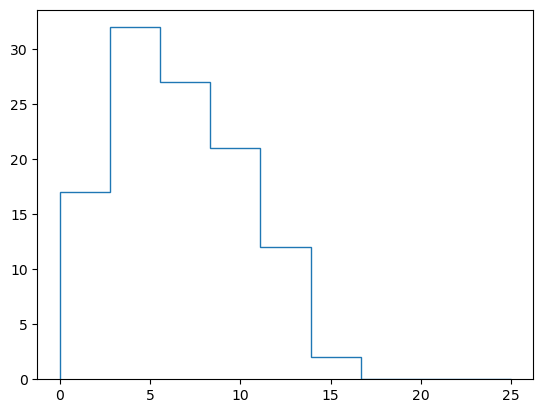

In [23]:
for data in dataset_r12:
    print(data)
    # print(data.edge_index[0])
    # print(data.edge_index[1])
    neighbors=data.edge_index[0]
    break

# Initialize an empty dictionary to hold counts
count_dict = {}

# Iterate through each number in the list
for number in neighbors:
    number = int(number)
    if number in count_dict:
        count_dict[number] += 1
    else:
        count_dict[number] = 1

print(count_dict)

# Sort the counts by number
sorted_counts = sorted(count_dict.items())

# Separate keys (numbers) and values (counts)
numbers, frequency = zip(*sorted_counts)

bin_edges = np.linspace(0, 25, 10)

plt.hist(frequency, bins=bin_edges, histtype='step', label='true')
plt.show()

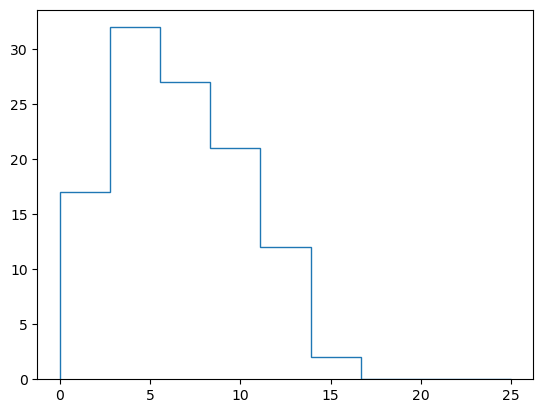